### Tasks
- Identify 5 features from this data set and apply feature engineering on them in Python
- Make atleast 5 data visualization using various python packages

### Dataset
Dataset from ruter (Akershus and Oslo) containg 6000 entries with 17 datapoints
- TurID
- Dato
- Lokasjon (Fylke, Område, Kommune)
- Holdeplass (Fra, Til)
- Linjeinfo (Fylke, Navn, Retning)
- Tidspunkter (Ankomst og Avgang, Planlagt og Faktisk)
- Passasjerer (Kapasitet, Antall)

### Notes
Timeformat can be over 24 h, eg. 25h meaning next day and one hour
Passasjerer_Ombord is purely the difference between the number of passangers that got in and out on that stop (can be negative)

**Ideas for features and visualizations**
- Kommune with biggest number of entries
- Kommune with highest number of Passasjerer Ombord
- Lines with highest number of unused seats
- Most popular times
- Lines with highest frequency of delays
- Time of day versus delays
- Delays versus number of passengers
- Busiest weekdays
- Regions with highest change in traffic on weekdays versus weekend
- Comtourplot av 

In [6]:
import pandas as pd
data = pd.read_csv("../datasets/Ruter_data.csv", delimiter=';')

In [7]:
data.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10


In [23]:
data.shape

(6000, 17)

In [19]:
import seaborn as sns
from matplotlib import pyplot as plot

<AxesSubplot:>

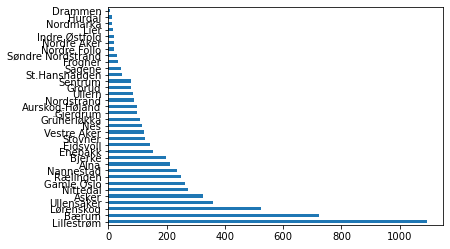

In [22]:
data['Kommune'].value_counts().plot.barh()

**Countour plot of delays**

A Contour plot with ach point resembling a unique average hour of the week, colored according to the difference in planned and actual arrival times at that time. This should draw out a really clear illustration of rush traffic, hopefully resembling a calender with days in the week on one axis, and hours in the day on the other axis.

Sub-problems
1. Make list of days containing tuple 
1. Make a 2D array data structure (24, 7)
2. Iterate over elements in said array and get all turIDs at corresponding time and date
3. Calculate their respective difference in expected and actual arrival time
4. Average this out for each time instance
5. Plot on contour
6. Tweak thresholds for aesthetic pleasing 😎

In [9]:
data['Dato']

0       10/08/2020
1       15/08/2020
2       03/08/2020
3       27/07/2020
4       27/08/2020
           ...    
5995    10/06/2020
5996    23/06/2020
5997    11/06/2020
5998    13/08/2020
5999    05/08/2020
Name: Dato, Length: 6000, dtype: object